In [1]:
import pymc3 as pm
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

In [2]:
#average work in progress - 3 developers + tester
mu = 5

#40 days - 8 weeks - 2 months
size_wip = 3
wipData = stats.poisson.rvs(mu, size=size_wip)
wipDataLarge = stats.poisson.rvs(mu, size=10000)
print(type(wipData))
#wipData = wipData[wipData > 0]
print(type(wipData))
print(len(wipData))
print("wipData mean:", wipData.mean())


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
3
wipData mean: 4.666666666666667


No handles with labels found to put in legend.


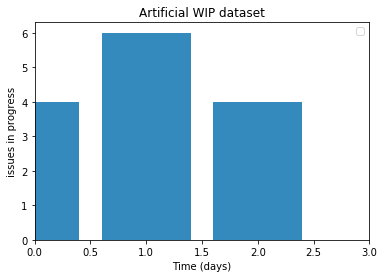

In [3]:
data = wipData
plt.bar(np.arange(len(data)), data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("issues in progress")
plt.title("Artificial WIP dataset")
plt.xlim(0, len(data))
plt.legend();

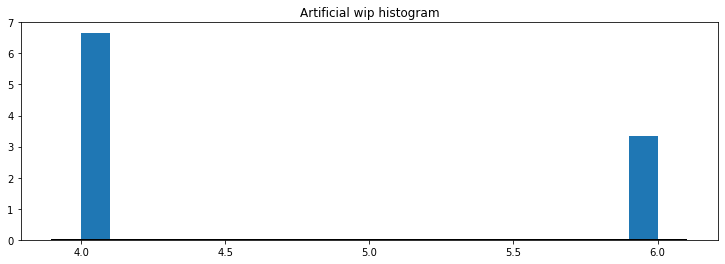

wip mean 4.666666666666667


In [4]:
figsize(12.5, 4)
plt.hist(wipData, bins=20, histtype="stepfilled", density=True)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.poisson.pmf(x, mu)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Artificial wip histogram")
plt.show()

print("wip mean", wipData.mean())

In [5]:
##### se: 1.2694539104909852 loce: -0.3026220328781628 scalee: 3.851991943530521


mean_cycle = 4
std_cycle = 1
size_cycle = size_wip

cycleData = np.random.normal(mean_cycle, std_cycle, size_cycle)
#cycleDataLarge = stats.lognorm.rvs(s = 1.26, loc = 0, scale=4, size = 10000)
#cycleData = np.random.lognormal(mean_cycle, std_cycle , size_cycle)
#= stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
#cycleData = stats.truncnorm.rvs((0 - mu) / std_cycle, b=100, loc=mean_cycle, scale=std_cycle, size=size_cycle)
print("cycleData mean:", cycleData.mean())
print("cycleData std:", cycleData.std())
#cycleData



cycleData mean: 4.737602018152589
cycleData std: 0.5388836400241199


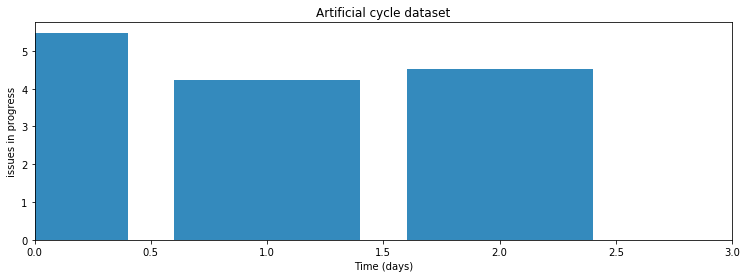

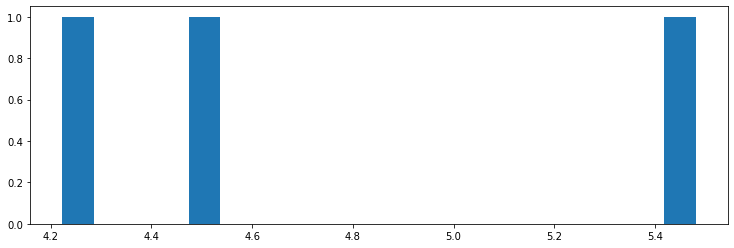

In [6]:
data = cycleData
_= plt.bar(np.arange(len(data)), data, color="#348ABD")
_= plt.xlabel("Time (days)")
_= plt.ylabel("issues in progress")
_= plt.title("Artificial cycle dataset")
_= plt.xlim(0, len(data))
#plt.legend();
_= plt.show()

figsize(12.5, 4)
_= plt.hist(data, bins=20, histtype="stepfilled")
#plt.legend();

In [7]:
# Set up the pymc3 model. Again assume Uniform priors for p_A and p_B.
with pm.Model() as model:

    troughput = pm.Normal("troughput", 1,0.5)
    
    
    
    
    mu_cycle = pm.Normal("mu_cycle", 5, 2)
    sigma_cycle = pm.Uniform("sigma_cycle", 0, 5)
    cycle = pm.Poisson("cycle", 5, observed=cycleData)
    mu_wip = pm.Deterministic("mu_wip", troughput * cycle)
    sigma_wip = pm.Uniform('sigma_wip', 0,10)

    wip = pm.Normal("wip", mu=mu_wip, sigma=sigma_wip, observed=wipData)
    
    
    trace = pm.sample(10000, tune=1000) 
    
    

    # To be explained in chapter 3.
#     step = pm.Metropolis()
#     trace = pm.sample(10000, step=step)
#     burned_trace=trace[1000:]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_wip, sigma_cycle, mu_cycle, troughput]
Sampling 4 chains, 10 divergences: 100%|██████████| 44000/44000 [00:14<00:00, 2998.18draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x127954208>],
      dtype=object)

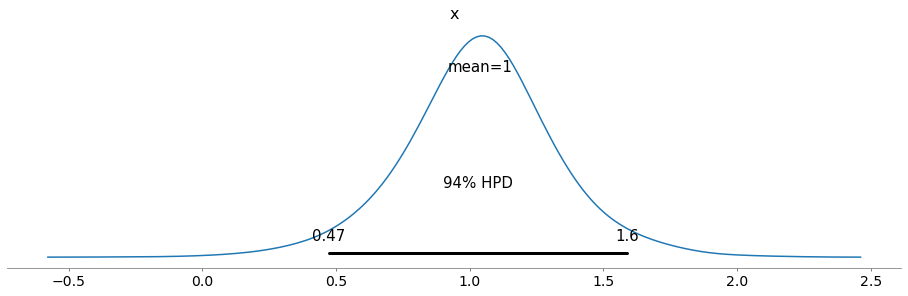

In [14]:
pm.plot_posterior( trace['troughput'], var_names= ['~mu_wip'])

In [15]:
trace['troughput'][::400].shape

(100,)

(100, 100)


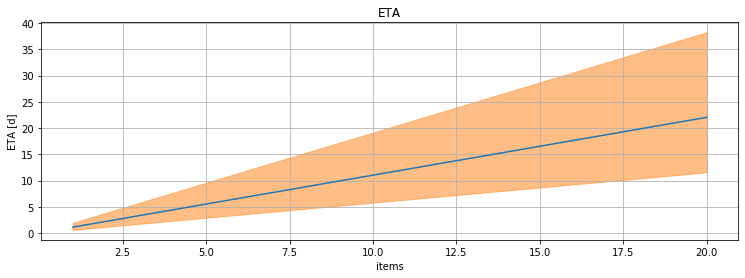

In [16]:
import arviz as az

items_avg = np.linspace(1, 20, 100)

#mu_pred = trace_5_3['a'] + trace_5_3['bA'][:,0] * R_avg[:,None]
mu_pred =  items_avg[:,None] / trace['troughput'][::400]

print(mu_pred.shape)
#eta_ = stats.norm.rvs(mu_pred, trace['sigma_timeToFinish'][::400])


# mu_pred = mu_pred[::20]
# items_avg = items_avg[::20]



plt.plot(items_avg, mu_pred.mean(1), 'C0')
plt.grid()
az.plot_hpd(items_avg, mu_pred.T)
#az.plot_hpd(items_avg, eta_.T)

plt.xlabel('items')
plt.ylabel('ETA [d]')
plt.title('ETA');

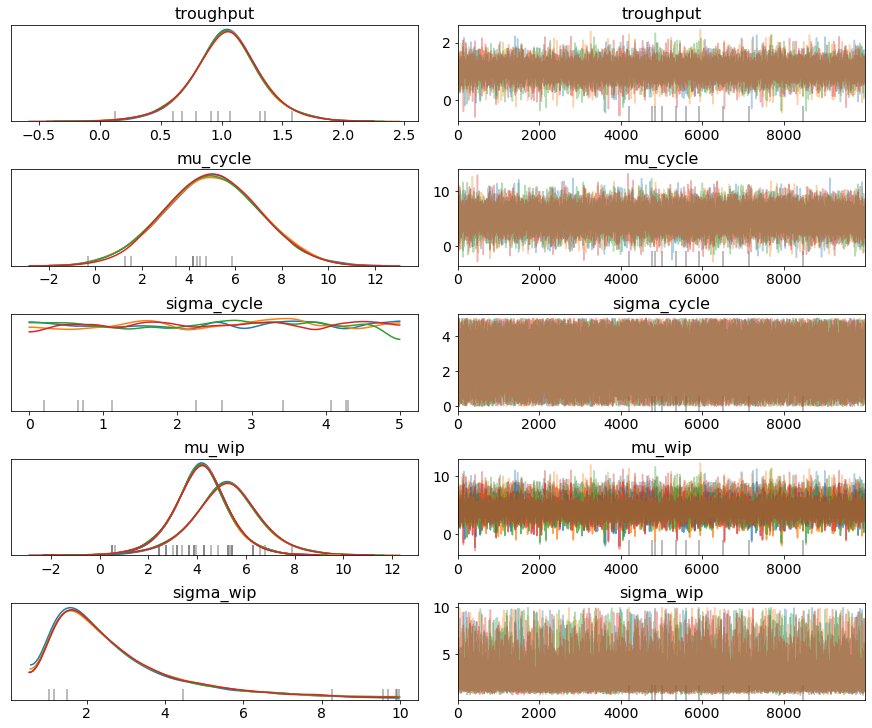

In [11]:
_=pm.traceplot(trace)

In [12]:
ax, = pm.plot_posterior( trace['timeToFinish'], credible_interval=0.8)
ax, = pm.densityplot( trace['timeToFinish'], credible_interval=0.80)
#ax.set_xlim(-5, 30000)

KeyError: 'Unknown variable timeToFinish'

In [ ]:
plt.hist(burned_trace['timeToFinish'], bins=200, histtype="stepfilled", density=True)
plt.legend();